### Import libraries

In [6]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Customize

In [7]:
# Customize the parameters
my_input_file="0709 Stock Close Price.csv"
num_portfolios = 10000
my_ef_weight="0711 efficient_frontier_weights.csv"
my_ef_plot="0711 efficient_frontier.png"

### Prepare for optimization

In [8]:
# Load stock data from CSV
csv_filename = my_input_file
data = pd.read_csv(csv_filename, index_col=0, parse_dates=True)

# Compute daily returns
returns = data.pct_change().dropna()

# Compute mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12244\711416066.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_filename, index_col=0, parse_dates=True)


### Define portfolio optimization function

In [9]:
# Portfolio Optimization Function
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

### Compute and save efficient frontier

In [10]:
# Generate Efficient Frontier

weights_list = []

results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(len(data.columns)), size=1).flatten()
    ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0, i] = ret
    results[1, i] = vol
    results[2, i] = ret / vol  # Sharpe Ratio (assuming risk-free rate = 0)
    results[3, i] = vol  # Portfolio Risk
    weights_list.append(weights)

### Plot and save efficient frontier

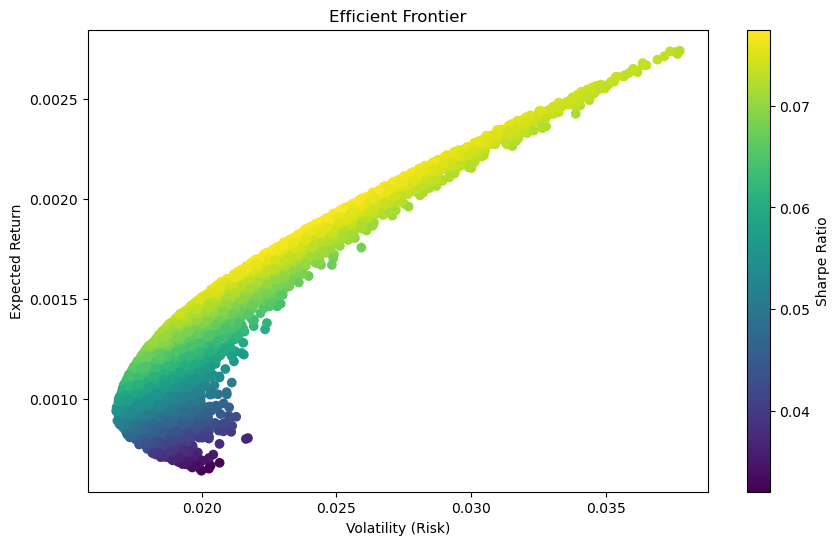

Efficient frontier data saved to: 0711 efficient_frontier_weights.csv
Efficient frontier plot saved to: 0711 efficient_frontier.png


In [11]:
# Save different weight allocations from efficient frontier
weights_df = pd.DataFrame(weights_list, columns=data.columns)
weights_df.insert(0, "Return", results[0, :])
weights_df.insert(1, "Volatility", results[1, :])
#weights_df.insert(2, "Portfolio Risk", results[3, :])
efficient_frontier_csv = my_ef_weight
weights_df.to_csv(efficient_frontier_csv, index=False)

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
frontier_plot_filename = my_ef_plot
plt.savefig(frontier_plot_filename)
plt.show()

# Display confirmation messages
print(f"Efficient frontier data saved to: {efficient_frontier_csv}")
print(f"Efficient frontier plot saved to: {frontier_plot_filename}")
